In [181]:
import sympy as sp
import gEconpy as ge
import gEconpy.plotting as gp

In [258]:
mod = ge.model_from_gcn("../../../gEconpy/GCN Files/RBC_two_household_additive.gcn")

Model Building Complete.
Found:
	16 equations
	16 variables
	The following variables were eliminated at user request:
		TC_t,U_NR_t,U_R_t
	The following "variables" were defined as constants and have been substituted away:
		mc_t
	2 stochastic shocks
		 0 / 2 has a defined prior. 
	9 parameters
		 0 / 9 has a defined prior. 
	0 parameters to calibrate.
Model appears well defined and ready to proceed to solving.



In [262]:
ss_res, success = mod.steady_state(how="root")

Output()

Steady state found
--------------------------------------------------------------------------------
Optimizer message             The solution converged.
Sum of squared residuals      1.4317932293331621e-21
Maximum absoluate error       2.69482214321215e-11
Gradient L2-norm at solution  1.7978379435964637e-10
Max abs gradient at solution  9.149458968238378e-11


In [271]:
ge.bk_condition(mod, steady_state_dict=ss_res)

Model solution has 4 eigenvalues greater than one in modulus and 4 forward-looking variables. 
Blanchard-Kahn condition is satisfied.


,Modulus,Real,Imaginary
0,1.653468e-35,-1.653468e-35,0.0
1,1.653028e-34,-1.653028e-34,0.0
2,1.686148e-34,1.686148e-34,0.0
3,7.255700e-23,-7.255700e-23,0.0
4,7.609220e-23,-7.609220e-23,0.0
5,9.155729e-22,9.155729e-22,0.0
6,1.014493e-21,-1.014493e-21,0.0
7,3.309565e-21,3.309565e-21,0.0
8,4.360073e-21,4.360073e-21,0.0
9,1.318637e-19,1.318637e-19,0.0


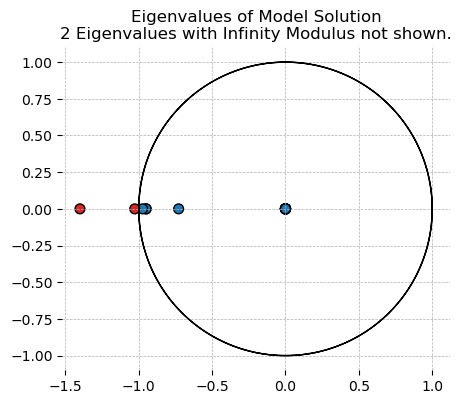

In [270]:
gp.plot_eigenvalues(mod, A=A, B=B, C=C, D=D);

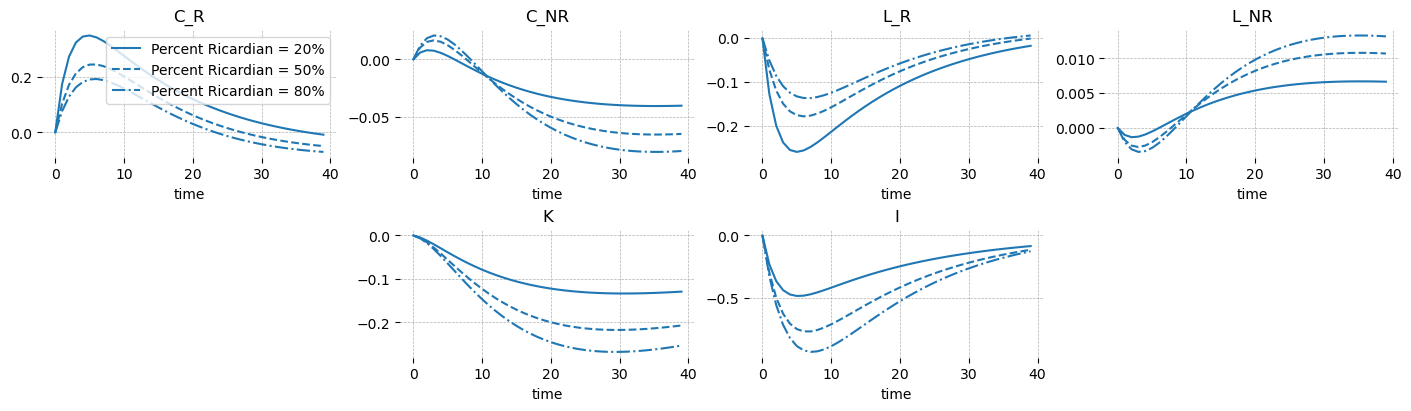

In [264]:
gp.plot_irf(
    {
        f"Percent Ricardian = {omega:0.0%}": ge.impulse_response_function(
            mod,
            shock_size={"epsilon_beta_R": 1.0},
            verbose=False,
            omega=omega,
            steady_state_kwargs={"how": "root", "verbose": False, "progressbar": False},
        )
        for omega in [0.2, 0.5, 0.8]
    },
    ["C_R", "C_NR", "L_R", "L_NR", "K", "I"],
    figsize=(14, 4),
);

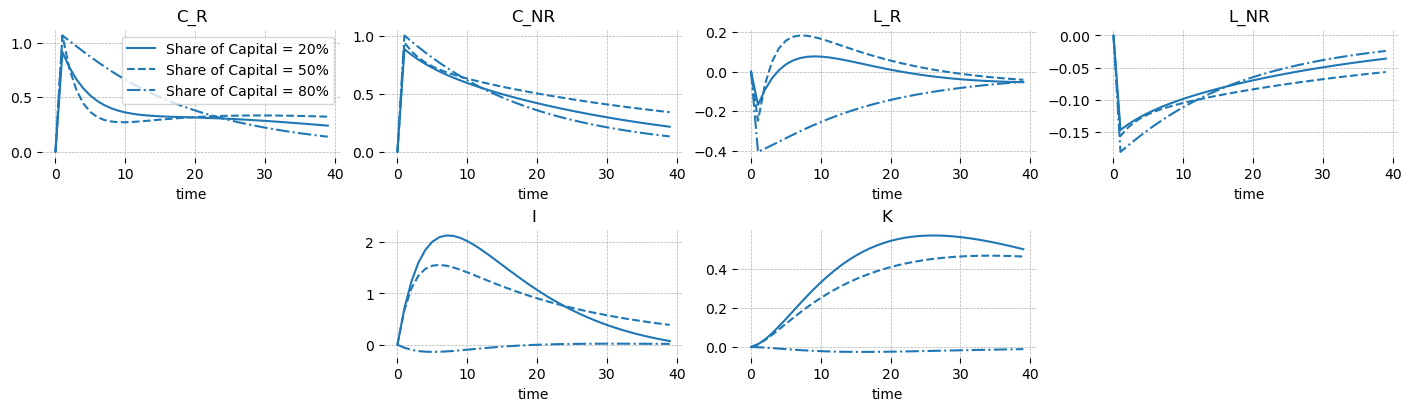

In [265]:
gp.plot_irf(
    {
        f"Share of Capital = {alpha:0.0%}": ge.impulse_response_function(
            mod,
            shock_size={"epsilon_TFP": 1.0},
            verbose=False,
            alpha=alpha,
            steady_state_kwargs={"how": "root", "verbose": False, "progressbar": False},
        )
        for alpha in [0.2, 0.5, 0.8]
    },
    ["C_R", "C_NR", "L_R", "L_NR", "I", "K"],
    figsize=(14, 4),
);